# Import the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read the excel file 

In [2]:
df=pd.read_excel('iris.xls')

# Display the file

In [3]:
df.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df.shape

(150, 5)

# Checking for null values

In [6]:
df.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

Null values present in SL,SW and PL columns

In [7]:
df.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

Need to fill the null values.. Checking the distribution to find whether median or mean is to be used for filling null values

In [8]:
frq_graph=df.select_dtypes(include=['float'])

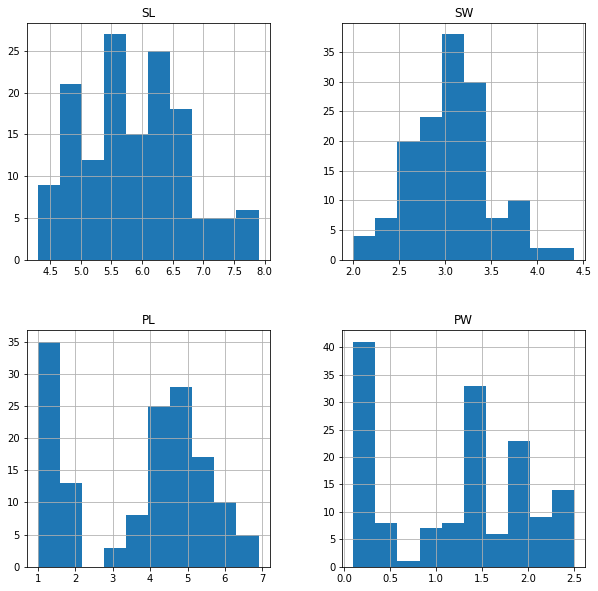

In [9]:
frq_graph.hist(figsize=[10,10])
plt.show()

# Since the distributions are not perfectly normal , we can fill null values with median

In [10]:
df.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [11]:
for i in ['SL', 'SW', 'PL', 'PW']:
    df[i]=df[i].fillna(df[i].median())

In [12]:
df.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

Now there are no null values

# Check for columns with unique values

In [13]:
df.nunique()

SL                35
SW                23
PL                44
PW                22
Classification     3
dtype: int64

# Checking outliers for numerical features

In [14]:
df.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SL'>

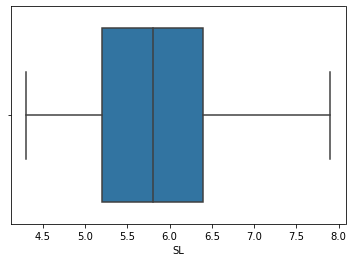

In [15]:
sns.boxplot(df['SL'])

No outliers for SL

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SW'>

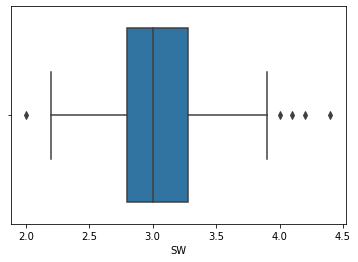

In [16]:
sns.boxplot(df['SW'])

Outliers are present in SW

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PL'>

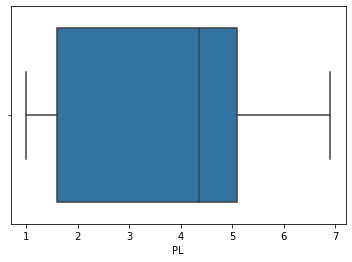

In [17]:
sns.boxplot(df['PL'])

No outliers for PL

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PW'>

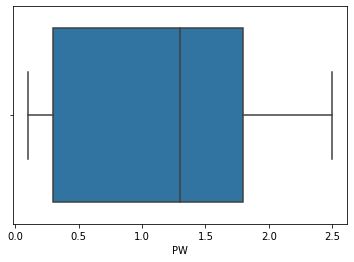

In [18]:
sns.boxplot(df['PW'])

No outliers for PW

# Removal of outliers for SW feature

In [19]:
Q1=np.percentile(df['SW'],25,interpolation='midpoint')
Q2=np.percentile(df['SW'],50,interpolation='midpoint')
Q3=np.percentile(df['SW'],75,interpolation='midpoint')

In [20]:
print(Q1)
print(Q2)
print(Q3)

2.8
3.0
3.25


In [21]:
IQR=Q3-Q1

In [22]:
low_limit=Q1-1.5*IQR
upp_limit=Q3+1.5*IQR

In [23]:
outlier=[]
for x in df['SW']:
    if ((x>upp_limit) or (x<low_limit)):
        outlier.append(x)

Find index of outliers and remove

In [24]:
ind1=df['SW']>upp_limit
out_ind=df.loc[ind1].index

In [25]:
out_ind

Int64Index([14, 15, 32, 33], dtype='int64')

In [26]:
df.drop([14, 15, 32, 33],inplace=True)

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SW'>

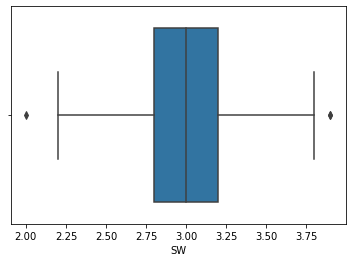

In [27]:
sns.boxplot(df['SW'])

Outliers are now removed

# Identifitying dependent variable y and independent variable x

In [28]:
df.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [29]:
x=df.drop(['Classification'],axis=1)

In [30]:
x

,SL,SW,PL,PW
0,5.1,3.5,1.40,0.2
1,4.9,3.0,1.40,0.2
2,5.8,3.2,1.30,0.2
3,4.6,3.1,1.50,0.2
4,5.0,3.6,1.40,0.2
...,...,...,...,...
145,6.7,3.0,5.20,2.3
146,6.3,2.5,5.00,1.9
147,6.5,3.0,4.35,2.0
148,6.2,3.4,5.40,2.3


In [31]:
y=df['Classification']

In [32]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Classification, Length: 146, dtype: object

In [33]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)

In [34]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [35]:
y=pd.DataFrame(y)

In [36]:
x

,SL,SW,PL,PW
0,5.1,3.5,1.40,0.2
1,4.9,3.0,1.40,0.2
2,5.8,3.2,1.30,0.2
3,4.6,3.1,1.50,0.2
4,5.0,3.6,1.40,0.2
...,...,...,...,...
145,6.7,3.0,5.20,2.3
146,6.3,2.5,5.00,1.9
147,6.5,3.0,4.35,2.0
148,6.2,3.4,5.40,2.3


In [37]:
y

,0
0,0
1,0
2,0
3,0
4,0
...,...
141,2
142,2
143,2
144,2


In [38]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)


In [39]:
x

array([[-0.93526384,  1.26838173, -1.43773164, -1.36124157],
       [-1.18085471, -0.04311779, -1.43773164, -1.36124157],
       [-0.07569581,  0.48148201, -1.49652963, -1.36124157],
       [-1.54924101,  0.21918211, -1.37893365, -1.36124157],
       [-1.05805928,  1.53068163, -1.43773164, -1.36124157],
       [-0.56687755,  2.31758134, -1.26133768, -1.09572217],
       [-1.54924101,  1.00608182, -1.43773164, -1.22848187],
       [-1.05805928,  1.00608182, -1.37893365, -1.36124157],
       [-1.79483187, -0.3054177 , -1.43773164, -1.36124157],
       [-1.18085471,  0.21918211, -1.37893365, -1.49400127],
       [-0.56687755, -0.04311779, -1.37893365, -1.36124157],
       [-1.30365014,  1.00608182, -1.32013567, -1.36124157],
       [-1.30365014, -0.04311779, -1.43773164, -1.49400127],
       [-1.91762731, -0.04311779, -1.61412561, -1.49400127],
       [-0.56687755,  2.31758134, -1.49652963, -1.09572217],
       [-0.93526384,  1.26838173, -1.43773164, -1.22848187],
       [-0.19849125,  2.

In [40]:
y

,0
0,0
1,0
2,0
3,0
4,0
...,...
141,2
142,2
143,2
144,2


# Splitting into train and test data

In [41]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# Perform Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression
log_mod=LogisticRegression()
log_mod=log_mod.fit(x_train,y_train)
y_pred=log_mod.predict(x_test)

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [43]:
y_pred

array([0, 2, 0, 0, 0, 2, 0, 1, 2, 0, 0, 2, 2, 1, 2, 0, 1, 2, 0, 1, 2, 2,
       0, 1, 0, 1, 1, 2, 2, 0])

# Checking the predicted values with metrics

In [47]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [48]:
 confusion_matrix(y_test,y_pred)

array([[12,  0,  0],
       [ 0,  7,  1],
       [ 0,  0, 10]], dtype=int64)

In [49]:
print('Accuracy=',accuracy_score(y_test,y_pred))


Accuracy= 0.9666666666666667


# Accuracy with Logistic Regression is 0.97

# KNN

In [50]:
from sklearn.neighbors import KNeighborsClassifier

In [51]:
metric_k=[]
neighbors=np.arange(3,15)
neighbors

array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [52]:
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='euclidean')
    classifier.fit(x_train,y_train)
    y_pred=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    metric_k.append(acc)

C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

In [53]:
metric_k

[0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9666666666666667,
 1.0,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667]

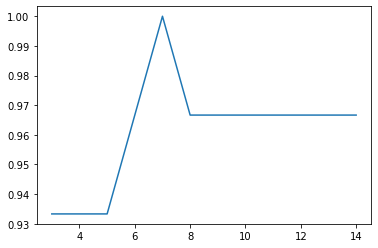

In [54]:
plt.plot(neighbors,metric_k)

We can choose k=7

In [55]:
 classifier=KNeighborsClassifier(n_neighbors=7,metric='euclidean')
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)
acc=accuracy_score(y_test,y_pred)

C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [56]:
acc

1.0

In [57]:
print('Accuracy=',accuracy_score(y_test,y_pred))


Accuracy= 1.0


In [58]:
 confusion_matrix(y_test,y_pred)

array([[12,  0,  0],
       [ 0,  8,  0],
       [ 0,  0, 10]], dtype=int64)

# Accuracy with KNN is 1

# SVM-linear

In [59]:
from sklearn.svm import SVC
svm_cls=SVC(kernel='linear')
svm_cls=svm_cls.fit(x_train,y_train)
y_pred=svm_cls.predict(x_test)

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [60]:
confusion_matrix(y_test,y_pred)

array([[12,  0,  0],
       [ 0,  6,  2],
       [ 0,  0, 10]], dtype=int64)

In [61]:
print('Accuracy with SVM-linear=',accuracy_score(y_test,y_pred))

Accuracy with SVM-linear= 0.9333333333333333


# Accuracy with SVM-linear is 0.93

# SVM-RBF

In [62]:
svm_cls_rbf=SVC(kernel='rbf')
svm_cls_rbf=svm_cls_rbf.fit(x_train,y_train)
y_pred=svm_cls_rbf.predict(x_test)

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [63]:
confusion_matrix(y_test,y_pred)


array([[12,  0,  0],
       [ 0,  8,  0],
       [ 0,  1,  9]], dtype=int64)

In [64]:
print('Accuracy with SVM RBF=',accuracy_score(y_test,y_pred))

Accuracy with SVM RBF= 0.9666666666666667


# Accuracy with SVM-rbf is 0.97

# DECISION TREE

In [65]:
from sklearn.tree import DecisionTreeClassifier
dt_cls=DecisionTreeClassifier()
dt_cls=dt_cls.fit(x_train,y_train)
y_pred=dt_cls.predict(x_test)

In [66]:
confusion_matrix(y_test,y_pred)

array([[12,  0,  0],
       [ 0,  7,  1],
       [ 0,  1,  9]], dtype=int64)

In [67]:
print('Accuracy with decision tree=',accuracy_score(y_test,y_pred))

Accuracy with decision tree= 0.9333333333333333


# Accuracy with decision tree is 0.93

# RANDOM FOREST

In [72]:
from sklearn.ensemble import RandomForestClassifier
rf_cls=RandomForestClassifier()
rf_cls=rf_cls.fit(x_train,y_train)
y_pred_rf=rf_cls.predict(x_test)

C:\Users\user\AppData\Local\Temp\ipykernel_5136\1000582610.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_cls=rf_cls.fit(x_train,y_train)


In [73]:
confusion_matrix(y_test,y_pred_rf)

array([[12,  0,  0],
       [ 0,  7,  1],
       [ 0,  1,  9]], dtype=int64)

In [75]:
print('Accuracy WITH RANDOM FOREST=',accuracy_score(y_test,y_pred_rf))

Accuracy WITH RANDOM FOREST= 0.9333333333333333


# Accuracy with Random forest is 0.93

# So the highest accuracy score is for KNN with an accuracy score of 1